In [101]:
import pandas as pd
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [80]:
with open('_chat.txt' , mode="r", encoding="utf8") as f:
    raw_text = f.read() 
    raw_text = raw_text.replace("\u202fp.\xa0m.", " p. m.")
    raw_text = raw_text.replace("\u200e", "")
    raw_text = raw_text.replace("[", "")
    raw_text = raw_text.replace(" Rosa Mesía: ", "|RM|")
    raw_text = raw_text.replace(" César Núñez: ", "|CN|")
    raw_text = raw_text.split("\n")
    lst_text = [text.split("|") for text in raw_text]

In [11]:
len(raw_text)

263927

In [81]:
lst_text = lst_text[2:]
print(lst_text[0:10])

[['20/08/18, 5:03:17 p. m.]', 'CN', 'Jejeje'], ['20/08/18, 9:14:20 p. m.]', 'RM', 'Gracias por escucharme  😉😉'], ['20/08/18, 9:14:41 p. m.]', 'RM', 'La próxima yo escucho 👍🏻'], ['20/08/18, 9:15:03 p. m.]', 'RM', 'Mándame el RT para reírme un rato'], ['20/08/18, 9:16:43 p. m.]', 'CN', 'Jajajaja'], ['20/08/18, 9:16:45 p. m.]', 'CN', 'Oyeee'], ['20/08/18, 9:16:49 p. m.]', 'CN', 'No sabes me siento mal'], ['20/08/18, 9:17:01 p. m.]', 'CN', 'Hice mi acción buena del día pero la cague luego'], ['20/08/18, 9:17:07 p. m.]', 'RM', 'Ahora qué pasó??'], ['20/08/18, 9:17:24 p. m.]', 'CN', 'Ayude a un ciego a cruzar la pista']]


In [82]:
for i, text in enumerate(lst_text):
    if len(text) == 3:
        date, name, msg = text
        lst_text[i] = [date[0:8], name, msg]
    else:
        date, name, msg = lst_text[i-1]
        lst_text[i] = [date[0:8], name, text[0]]

In [83]:
print(lst_text[0:10])

[['20/08/18', 'CN', 'Jejeje'], ['20/08/18', 'RM', 'Gracias por escucharme  😉😉'], ['20/08/18', 'RM', 'La próxima yo escucho 👍🏻'], ['20/08/18', 'RM', 'Mándame el RT para reírme un rato'], ['20/08/18', 'CN', 'Jajajaja'], ['20/08/18', 'CN', 'Oyeee'], ['20/08/18', 'CN', 'No sabes me siento mal'], ['20/08/18', 'CN', 'Hice mi acción buena del día pero la cague luego'], ['20/08/18', 'RM', 'Ahora qué pasó??'], ['20/08/18', 'CN', 'Ayude a un ciego a cruzar la pista']]


In [109]:
dict_msg = {"Date": [],
            "Name" : [],
            "Message" : []}
for text in lst_text:
    date, name, msg = text
    if date[-1] == ",":
        date = "0" + date[0:-1]
    if (msg == "imagen omitida") or (msg == "sticker omitido"):
        dict_msg["Message"].append("")
    else:
        dict_msg["Message"].append(msg)
    dict_msg["Date"].append(date)
    dict_msg["Name"].append(name)

In [110]:
df = pd.DataFrame(dict_msg)
df = df[df["Date"] != "Echa un "]
df['Date'] = pd.to_datetime(df["Date"])

C:\Users\canun\AppData\Local\Temp\ipykernel_24524\595045718.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df["Date"])


In [105]:
def cleanPunctNotHyphen(doc):
    return re.sub(r'[",",".",":",";","'",'"',"(",")","~","*","!","?","¿",""","“"]','', doc)

def tokenize(doc):
    return doc.split()

def quita_tildes(doc):
    doc = doc.replace("á","a")
    doc = doc.replace("é","e")
    doc = doc.replace("í","i")
    doc = doc.replace("ó","o")
    doc = doc.replace("ú","u")
    return doc
    
def lowerCase(list):
    return [word.lower() for word in list]

def stopWords(list):
    stop= stopwords.words("spanish")
    return [word for word in list if word not in stop]

def reducir_vocales_repetidas(doc):
    # Reemplaza múltiples vocales consecutivas por una sola vocal
    return re.sub(r'[aeiouAEIOU]+', lambda m: m.group(0)[0], doc)

def cleanUpSteps(doc):
    return stopWords(lowerCase(tokenize(reducir_vocales_repetidas(quita_tildes(cleanPunctNotHyphen(doc))))))

In [106]:
def makeTFDictionary(cleanDoc):
    docTermDictionary = {}
    for word in cleanDoc:
        docTermDictionary[word] = docTermDictionary.get(word,0) + 1
    return docTermDictionary

In [107]:
docTermDictionary = {}
for i, obs in enumerate(df['Message']):
    cleanObs = cleanUpSteps(obs)
    for word in cleanObs:
        docTermDictionary[word] = docTermDictionary.get(word,0) + 1

del obs, cleanObs, word, i
docTermDictionary

{'jejeje': 198,
 'gracis': 1264,
 'escucharme': 12,
 '😉😉': 23,
 'proxima': 202,
 'escucho': 82,
 '👍🏻': 27,
 'mandame': 10,
 'rt': 2,
 'rerme': 4,
 'rato': 289,
 'jajajaja': 1667,
 'oye': 138,
 'sabes': 1010,
 'sinto': 910,
 'mal': 1050,
 'hice': 285,
 'accin': 16,
 'buna': 632,
 'di': 2286,
 'cagu': 13,
 'lugo': 935,
 'ahora': 2277,
 'qu': 41627,
 'paso': 1649,
 'ayude': 45,
 'cigo': 10,
 'cruzar': 21,
 'pista': 27,
 'cundo': 2945,
 'despedi': 10,
 'dije': 893,
 'vemos”': 2,
 'inerci': 1,
 'maldito': 21,
 '😭😭': 237,
 '😂😂😂': 136,
 'fu': 1735,
 'solo': 3074,
 'reccin': 17,
 'escuchame': 1,
 'tomas': 233,
 'si': 16441,
 'aprobo': 21,
 'cirto': 836,
 'licencitura': 7,
 'c': 57,
 's': 213,
 'r': 59,
 'dr': 64,
 'reto': 22,
 'jajaja': 1516,
 'bunazo': 130,
 'escribi': 153,
 'convocatori': 17,
 'quri': 538,
 'felicitarlo': 1,
 'cargarla': 3,
 '😟😟😟': 2,
 'ayudaste': 2,
 'invidente': 1,
 'bun': 654,
 'trabajo': 716,
 '💪🏻': 42,
 'tipico': 5,
 '🙈🙈': 378,
 'valores': 8,
 'estan': 1466,
 'mando': 1

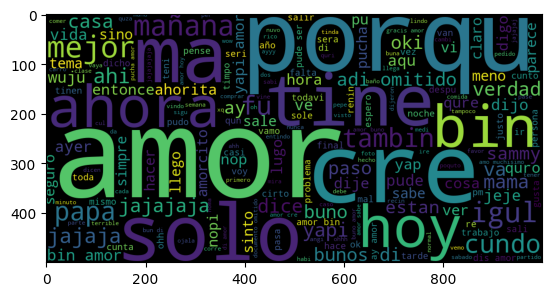

In [113]:
listTerms = []
for obs in df['Message']:
    for word in cleanUpSteps(obs):
        listTerms.append(word)

listTerms = [item for item in listTerms if item not in ["si","sipi","qu","sip","asi","tb"]]
unique_string=(" ").join(listTerms)

wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.imshow(wordcloud)

del unique_string, wordcloud, word, obs, listTerms